## NAME: MUHAMMAD WAJAHAT TARIQ
## ROLL NUMBER: 22F-BSAI-17
## SUBMITTED TO: MR.HAMZA FAROOQUI

## PROGRAMMING OF AI ASSIGNMENT

## Q1: Outlier Detection and Feature Reduction

In [4]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import zscore

df = pd.read_csv("patient_data.csv")

numeric_cols = df.select_dtypes(include=[np.number])
non_numeric_cols = df.select_dtypes(exclude=[np.number])

selector = VarianceThreshold()
numeric_selected = selector.fit_transform(numeric_cols)
selected_cols = numeric_cols.columns[selector.get_support()]

numeric_df = pd.DataFrame(numeric_selected, columns=selected_cols)

df = pd.concat([numeric_df, non_numeric_cols.reset_index(drop=True)], axis=1)

df['Zscore'] = zscore(df['CholesterolLevel'])
df = df[df['Zscore'].abs() < 3]
df = df.drop(columns=['Zscore'])

df = df.fillna(df.mean(numeric_only=True))
df.head()


,PatientID,Age,CholesterolLevel,BloodPressure,Gender,Region,RiskCategory
0,1.0,37.0,193.4,129.4,Male,East,High
1,2.0,45.0,210.7,107.1,Female,West,Low
2,3.0,63.0,244.3,103.9,Male,West,Low
3,4.0,53.0,184.5,127.2,Male,West,High
4,5.0,29.0,175.7,116.6,Male,South,High


## Q2: Data Visualization

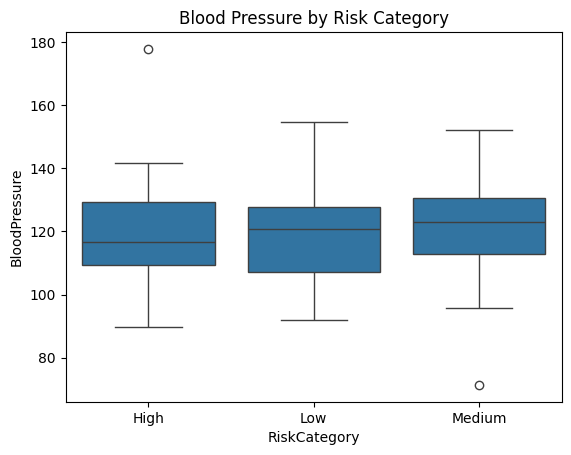

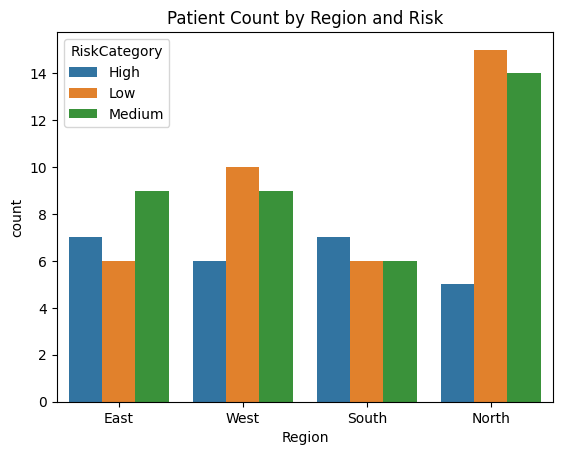

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='RiskCategory', y='BloodPressure', data=df)
plt.title("Blood Pressure by Risk Category")
plt.show()

sns.countplot(x='Region', hue='RiskCategory', data=df)
plt.title("Patient Count by Region and Risk")
plt.show()


## Q3: Hypothesis Testing

In [7]:
from scipy.stats import ttest_1samp

sample = df['CholesterolLevel'].sample(20, random_state=0)
t_stat, p_val = ttest_1samp(sample, 200)

print(t_stat, p_val)

if p_val < 0.05:
    print("Reject H₀")
else:
    print("Fail to reject H₀")

from scipy.stats import chi2_contingency

table = pd.crosstab(df['Region'], df['RiskCategory'])
chi2, p, dof, expected = chi2_contingency(table)

print(chi2, p)

if p < 0.05:
    print("Reject H₀")
else:
    print("Fail to reject H₀")

0.9363765599586905 0.3608296931766658
Fail to reject H₀
4.537654289304933 0.6043217060679176
Fail to reject H₀


## Q4: ODE – Medication in Bloodstream

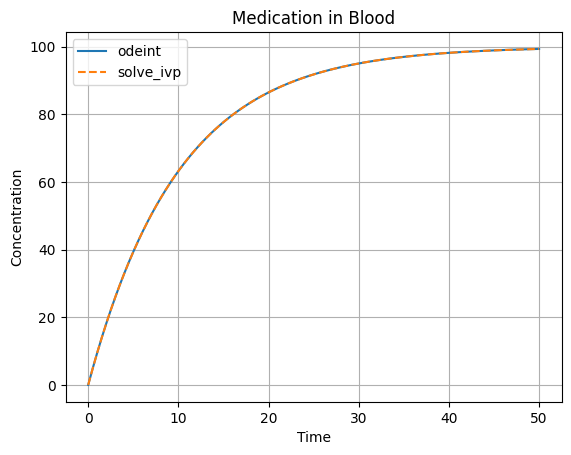

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp

k = 0.1
D = 100
C0 = 0

def equation(C, t):
    return k * (D - C)

t = np.linspace(0, 50, 100)
C1 = odeint(equation, C0, t)

def eq(t, C):
    return k * (D - C)

sol = solve_ivp(eq, [0, 50], [C0], t_eval=t)

plt.plot(t, C1, label="odeint")
plt.plot(sol.t, sol.y[0], '--', label="solve_ivp")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.title("Medication in Blood")
plt.legend()
plt.grid(True)
plt.show()
